#### **Quantum Computing with Matrices Exercises**

##### **Ex.1:Write $V = \begin{bmatrix} 3+2i \\ 4-2i \end{bmatrix}$ as a sum of $|0\rangle$ and $|1 \rangle$**

To create a state $|\psi\rangle$ equivalent to the state $V$ above we need to normalize it. Remember that for $|\psi\rangle = a|0\rangle + b|1\rangle$ to represent a qubit vector state, $|a|^2+|b|^2=1$.

Also, remember that if $a$ is a complex number like $a = 3+4.i$, its module $|a|$ is calculated by $|a|^2 = a^*.a = (3-4i).(3+4i) = 25$. Therefore $|a|=5$. $a^*$ is the complex conjugate of $a$

In [ ]:
import numpy as np

V = np.array([[3+2j],[4-2j]])
modV = np.real(V.T.conjugate().dot(V)[0,0])**0.5
Vn = V/modV; Vn

array([[0.522+0.348j],
       [0.696-0.348j]])

In [ ]:
v0 = np.array([[1,0]]).T
v1 = np.array([[0,1]]).T
Vn[0,0]*v0 + Vn[1,0]*v1

array([[0.522+0.348j],
       [0.696-0.348j]])

The quantum circuit below represents this state.

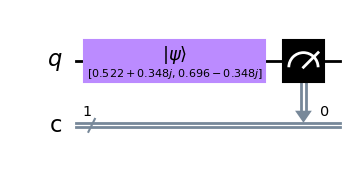

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(1,'q')
cr = qk.ClassicalRegister(1,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([Vn[0,0],Vn[1,0]],0)
qc.measure(qr[0],cr[0])
qc.draw('mpl', style="clifford")

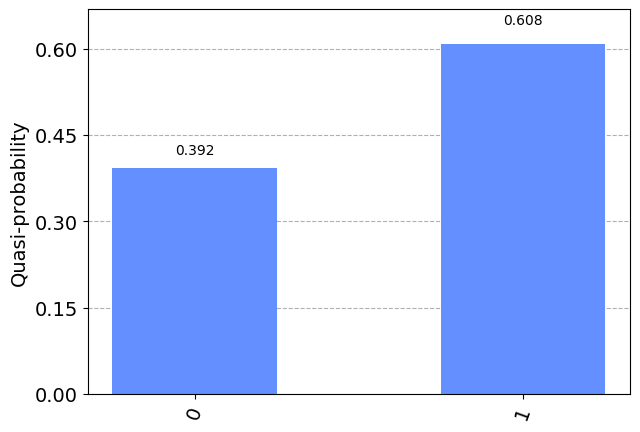

In [ ]:
backend = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,backend,shots=10000).result().get_counts()
qk.visualization.plot_distribution(results)

Let's confirm the probabilities calculating them from the state $V$ normalized amplitudes.

In [ ]:
Vn[0,0].conjugate()*Vn[0,0]

(0.39393939393939403+0j)

In [ ]:
Vn[1,0].conjugate()*Vn[1,0]

(0.6060606060606062+0j)

##### **Ex.2: Using matrices, prove that the CNOT gate is its own inverse. Do the same for the Hadamard gate**

In [ ]:
import numpy as np
CNOT = np.array([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,0,1],
                 [0,0,1,0]])
CNOT.dot(CNOT)

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [ ]:
import numpy as np
H = np.array([[1,1],[1,-1]])/2**0.5
H.dot(H)

array([[ 1., -0.],
       [-0.,  1.]])

To check this result let's draw the histogram of 10.000 shots of each of these three circuits.

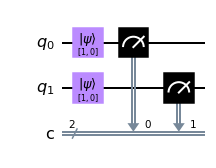

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.measure(qr,cr)
qc.draw('mpl')

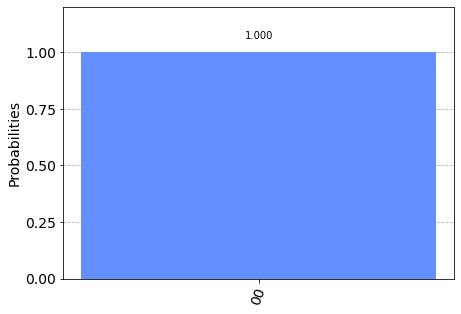

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

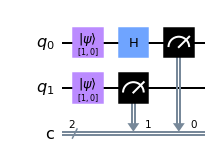

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.h(0)
qc.measure(qr,cr)
qc.draw('mpl')

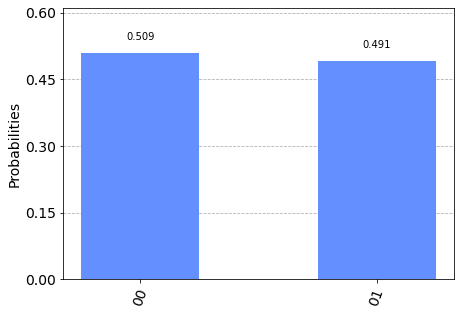

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

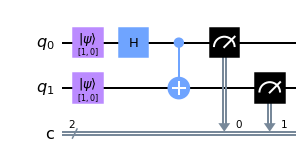

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.h(0)
qc.cnot(qr[0],qr[1])
qc.measure(qr,cr)
qc.draw('mpl')

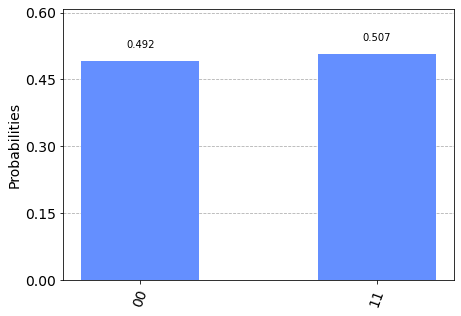

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

Now let's apply the gates in reverse order and see that the histograms repeat themselves (in reverse order also)

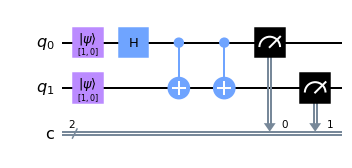

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.h(0)
qc.cnot(qr[0],qr[1])
qc.cnot(qr[0],qr[1])
qc.measure(qr,cr)
qc.draw('mpl')

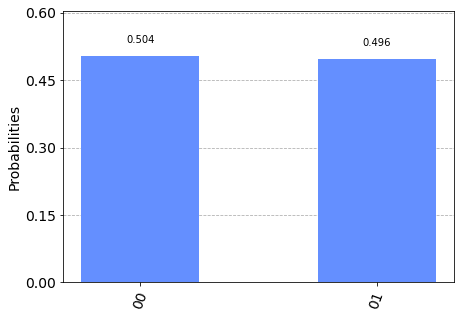

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

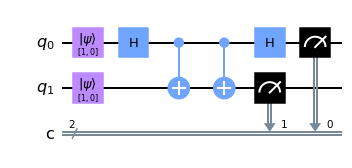

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.h(0)
qc.cnot(qr[0],qr[1])
qc.cnot(qr[0],qr[1])
qc.h(0)
qc.measure(qr,cr)
qc.draw('mpl')

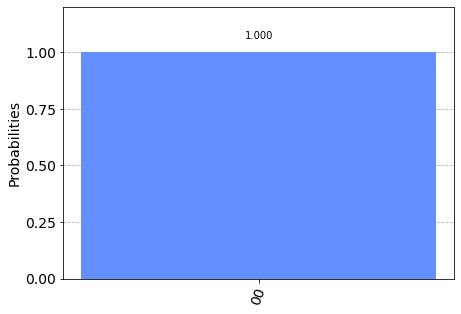

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

##### **Ex.3a1: Present the X Pauli matrix $ \begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}  $ and show that it is its own inverse**

In [ ]:
import numpy as np
X = np.array([[0,1],
              [1,0]])
X

array([[0, 1],
       [1, 0]])

In [ ]:
X.conj().T.dot(X)

array([[1, 0],
       [0, 1]])

##### **Ex.3a2: Present the Y Pauli matrix $ \begin{bmatrix}
0 & -j \\
j & 0
\end{bmatrix}  $ and show that it is its own inverse**

In [ ]:
Y = np.array([[0,-1j],
              [1j,0]])
Y

array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

In [ ]:
Y.conj().T.dot(Y)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

##### **Ex.3a3: Present the Z Pauli matrix $ \begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}  $ and show that it is its own inverse**

In [ ]:
Z = np.array([[1,0],
              [0,-1]])
Z

array([[ 1,  0],
       [ 0, -1]])

In [ ]:
Z.conj().T.dot(Z)

array([[1, 0],
       [0, 1]])

##### **Ex.3b: Show that $H = \frac{1}{\sqrt{2}}( X + Z)$  through numpy**

In [ ]:
H = (X+Z)/np.sqrt(2); H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

##### **Ex.3c: Show that $X = H.Z.H$**

In [ ]:
H.dot(Z).dot(H)

array([[-2.23711432e-17,  1.00000000e+00],
       [ 1.00000000e+00, -2.23711432e-17]])

##### **Ex.3d: Show that Z = H.X.H**

In [ ]:
H.dot(X).dot(H)

array([[ 1.00000000e+00, -2.23711432e-17],
       [ 2.23711432e-17, -1.00000000e+00]])

##### **Ex.3e: Show that Y = -H.Y.H**

In [ ]:
-H.dot(Y).dot(H)

array([[-0.+2.23711432e-17j, -0.-1.00000000e+00j],
       [-0.+1.00000000e+00j, -0.-2.23711432e-17j]])

##### **Ex.4a1: Present the matrix S = $ \begin{bmatrix}
1 & 0 \\
0 & j
\end{bmatrix}  $ and show that it is its own inverse**

In [ ]:
import numpy as np
S = np.array([[1,0],
              [0,1j]])
S

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

In [ ]:
S.conj().T.dot(S)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

##### **Ex.4a2: Present the matrix T = $ \begin{bmatrix}
1 & 0 \\
0 & e^{j\frac{\pi}{4}}
\end{bmatrix}  $ and show that it is its own inverse**

In [ ]:
T = np.array([[1,0],
              [0,np.exp(1j*np.pi/4)]])
T

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707+0.707j]])

In [ ]:
T.conj().T.dot(T)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

##### **Ex.5:Show the SWAP operator matrix $S = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}  $**

The SWAP exchanges the first with the second bit. Therefore $S|00\rangle = |00\rangle$, $S|01\rangle = |10\rangle$, $S|10\rangle = |01\rangle$ and $S|11\rangle = |11\rangle$

In [ ]:
S = np.array([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]]); S

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

In [ ]:
S.dot(v00)

array([[1],
       [0],
       [0],
       [0]])

In [ ]:
S.dot(v01)

array([[0],
       [0],
       [1],
       [0]])

In [ ]:
S.dot(v10)

array([[0],
       [1],
       [0],
       [0]])

In [ ]:
S.dot(v11)

array([[0],
       [0],
       [0],
       [1]])

##### **Ex.6:Show that $S_{ij} = C_{ij}$ $ \cdot $ $C_{ji} \cdot C_{ij}$**

Vamos confirmar que $C_{ij}.C_{ji}.C_{ij} = S_{ij}$

$$C_{ij}.C_{ji}.C_{ij}.|00\rangle = C_{ij}.C_{ji}.|00\rangle = C_{ij}.|00\rangle = |00\rangle$$

$$C_{ij}.C_{ji}.C_{ij}.|01\rangle = C_{ij}.C_{ji}.|01\rangle = C_{ij}.|11\rangle = |10\rangle$$

$$C_{ij}.C_{ji}.C_{ij}.|10\rangle = C_{ij}.C_{ji}.|11\rangle = C_{ij}.|01\rangle = |01\rangle$$

$$C_{ij}.C_{ji}.C_{ij}.|11\rangle = C_{ij}.C_{ji}.|10\rangle = C_{ij}.|10\rangle = |11\rangle$$

In [ ]:
C = np.array([[1,0,0,0],
              [0,1,0,0],
              [0,0,0,1],
              [0,0,1,0]]);C

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
C_ = np.array([[1,0,0,0],
               [0,0,0,1],
               [0,0,1,0],
               [0,1,0,0]]);C_

array([[1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0]])

In [ ]:
C.dot(C_).dot(C)

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

##### **Ex.7: Present the projection operators $n$ and $n'$**

O operador $n$ projeta um vetor qualquer $|\psi\rangle = a|0\rangle + b|1\rangle$ em sua componente $|1\rangle$. O operador $n'$ é o complemento de $n$ (igual a $I-n$) e projeta o vetor na sua componente $|0\rangle$. $I$ é a matriz identidade de 2a ordem (2x2).

In [ ]:
v = v0 + v1; v

array([[1],
       [1]])

In [ ]:
n = np.array([[0,0],[0,1]]); n

array([[0, 0],
       [0, 1]])

In [ ]:
n.dot(v)

array([[0],
       [1]])

In [ ]:
n_ = np.array([[1,0],[0,0]]);n_

array([[1, 0],
       [0, 0]])

In [ ]:
I2 = np.identity(2); I2

array([[1., 0.],
       [0., 1.]])

In [ ]:
I2 - n

array([[1., 0.],
       [0., 0.]])

In [ ]:
n_.dot(v)

array([[1],
       [0]])

##### **Ex.7b: Prove that: $n^2 = n$ and $n'^2 = n'$**

In [ ]:
n.dot(n)

array([[0, 0],
       [0, 1]])

In [ ]:
n_.dot(n_)

array([[1, 0],
       [0, 0]])

##### **Ex.7c: Prove that $nn'=0$ and $n'n=0$**

In [ ]:
n.dot(n_)

array([[0, 0],
       [0, 0]])

In [ ]:
n_.dot(n)

array([[0, 0],
       [0, 0]])

##### **Ex.7d: Prove that $n+n'=I$**

In [ ]:
n+n_

array([[1, 0],
       [0, 1]])

##### **Ex.7e: Prove that $nX=Xn'$ and $Xn = n'X$**

In [ ]:
n.dot(X)

array([[0, 0],
       [1, 0]])

In [ ]:
X.dot(n_)

array([[0, 0],
       [1, 0]])

##### **Ex.8: Analize the expression: $S_{ij} = n_in_j + n'_in'_j$ $+ X_iX_j(n_in'_j + n'_in_j)$**

In [ ]:
import numpy as np
n = np.array([[0,0],[0,1]]); n

array([[0, 0],
       [0, 1]])

In [ ]:
n_ = np.array([[1,0],[0,0]]);n_

array([[1, 0],
       [0, 0]])

In [ ]:
# ni nj operam em bits distintos. Como cada operador n atua em um vetor de
#  2 dimensões, ni nj é um operador de 4 dimensões. Sendo assim, fica implícito
#  pelos subscritos que ni nj é um produto tensorial.
np.kron(n,n)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1]])

In [ ]:
# O mesmo vale para n'i n'j
np.kron(n_,n_)

array([[1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
# Para ni n'j
np.kron(n,n_)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0]])

In [ ]:
# E para n'i nj
np.kron(n_,n)

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
# Xi Xj são dois operadores 2x2 de inversão, cada um atuando em um bit
#  distinto. Sendo assim, fazemos o produto tensorial entre ambos
#  para obter XiXj
np.kron(X,X)

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [ ]:
# No caso da expressão XiXj(ninj' + ni'nj) temos entre parênteses duas
#  matrizes 4x4 (ninj'+ni'nj) e fora dos parênteses uma matriz 4x4 (XiXj)
#  Sendo assim fazemos neste caso o produto matricial normal para
#  calcular esta expressão.
np.kron(X,X).dot(np.kron(n,n_)+np.kron(n_,n))

array([[0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
# E por último somamos com o resultado inicial de ninj + ni'nj'
#  Como pode-se ver, esta expressão gera o operador de SWAP
np.kron(n,n) + np.kron(n_,n_) + np.kron(X,X).dot(np.kron(n,n_)+np.kron(n_,n))

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

In [ ]:
# É importante observar que ninj forma um operador que projeta um vetor de
#  4 dimensões (00, 01, 10, 11) em sua componente 11
np.kron(n,n)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1]])

In [ ]:
# De maneira similar ni'nj' projeta um vetor de 4 dimensões em sua componente 00
np.kron(n_,n_)

array([[1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
# ni'nj projeta em 01
np.kron(n_,n)

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
# Assim como ninj' projeta em 10
np.kron(n,n_)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0]])

In [ ]:
# E por último vemos que ni'nj' + ni'nj + ninj' + ninj = I
nn = np.kron(n,n)
nn_ = np.kron(n,n_)
n_n = np.kron(n_,n)
n_n_ = np.kron(n_,n_)
nn + nn_ + n_n + n_n_

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

##### **Ex.9: Prove that $(a \otimes b)$ $.(c \otimes d)$ $= (a.c)$ $\otimes(b.d)$**

##### **Ex.10: Prove that $(n \otimes n)$ $.(n' \otimes n') = 0$**

In [ ]:
import numpy as np
n = np.array([[0,0],[0,1]]); n

array([[0, 0],
       [0, 1]])

In [ ]:
n_ = np.array([[1,0],[0,0]]);n_

array([[1, 0],
       [0, 0]])

In [ ]:
# (n x n).(n_ x n_)
np.kron(n,n).dot(np.kron(n_,n_))

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
# Faz sentido que (ni x nj).(ni_ x nj_) seja o vetor nulo pois:
#   ni_ x nj_ é um operador que recebe um vetor de 4 dimensões e
#   produz como resultado apenas sua componente |00>. Por sua
#   vez ni x nj é um operador que recebe um vetor de 4 dimensões
#   e produz como resultado apenas sua componente |11>. Esta
#   componente foi zerada pelo primeiro operador, logo o resultado
#   será nulo. Isto vai acontecer sempre que a componente não
#   zerada do primeiro operador for diferente da do segundo em
#   outras palavras sempre que ij do primeiro for diferente de ij
#   do segundo.

In [ ]:
np.kron(n,n).dot(np.kron(n_,n_))

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
# Outra forma de entender é transformar (n x n).(n_ x n_) em
#  (n.n_) x (n.n_). Como n é ortogonal a n_, a projeção de n
#  em n_ dará zero também.

In [ ]:
np.kron(n.dot(n_),n.dot(n_))

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
nn.dot(n_n_)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
# (n_ x n).(n x n_)
np.kron(n_,n).dot(np.kron(n,n_))

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
n_n.dot(nn_)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
# (n x n_).(n_ x n)
np.kron(n, n_).dot(np.kron(n_,n))

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
nn_.dot(n_n)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
# (n_ x n_).(n x n)
np.kron(n_, n_).dot(np.kron(n, n))

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
n_n_.dot(nn)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])